#Descriptive Statistics:
##Obtain basic statistics for textual lengths (like headline length).
##Count the number of articles per publisher to identify which publishers are most active.
##Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [2]:
import pandas as pd

# Load the analyst ratings data
df = pd.read_csv('../data/raw_analyst_ratings/raw_analyst_ratings.csv')

# Display first 5 rows to verify
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [3]:
# Create a new column for headline length
df['headline_length'] = df['headline'].str.len()

# Basic statistics
headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


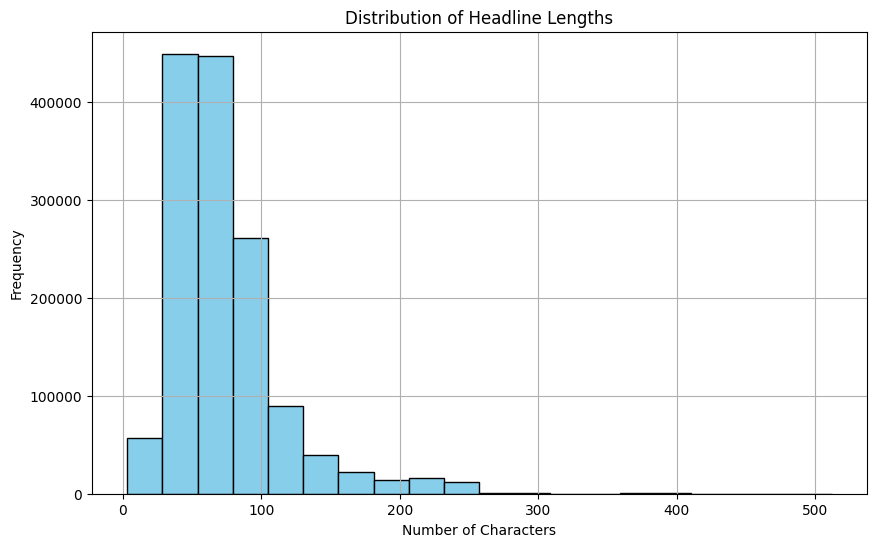

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
# Group by publisher and get mean headline length
publisher_stats = df.groupby('publisher')['headline_length'].agg(['mean', 'count'])
print(publisher_stats.sort_values(by='count', ascending=False))

                              mean   count
publisher                                 
Paul Quintaro            84.347839  228373
Lisa Levin               47.502998  186979
Benzinga Newsdesk       114.650508  150484
Charles Gross            80.999328   96732
Monica Gerson            51.002950   82380
...                            ...     ...
MyConstant Chris Roper  103.000000       1
milesyoung               40.000000       1
Nat                     114.000000       1
mjintertrader            49.000000       1
Adam Weiner              32.000000       1

[1034 rows x 2 columns]


In [6]:
# Shortest headlines
shortest = df.nsmallest(5, 'headline_length')[['headline', 'headline_length']]
print("Shortest Headlines:\n", shortest)

# Longest headlines
longest = df.nlargest(5, 'headline_length')[['headline', 'headline_length']]
print("\nLongest Headlines:\n", longest)

Shortest Headlines:
        headline  headline_length
530954      SPY                3
530955      SRS                3
602684      J.P                3
678958      AMJ                3
912819      J.P                3

Longest Headlines:
                                                  headline  headline_length
701748  JinkoSolar Tiger Pro Series Receives World's F...              512
238137  Check Point® Software Technologies Ltd. (NASDA...              509
39028   Shares of several financial services companies...              458
140048  Shares of several financial services companies...              458
140381  Shares of several financial services companies...              458


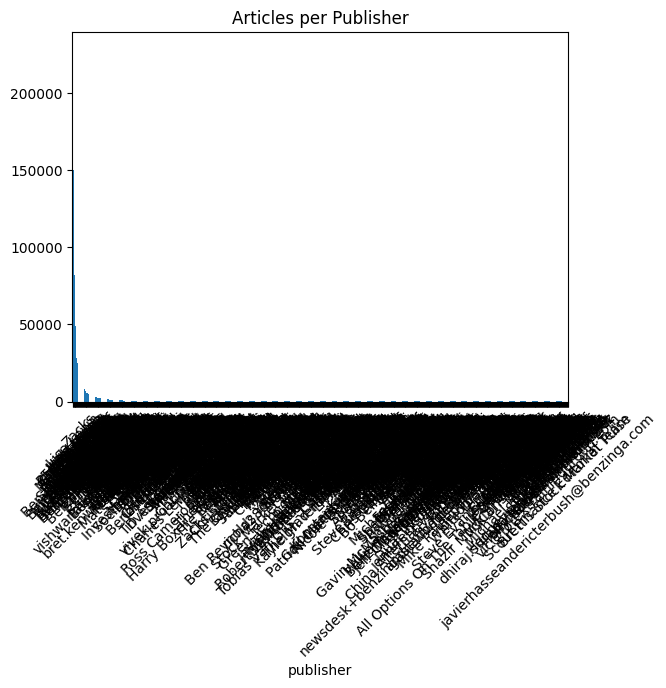

In [7]:
# Bar plot for publisher frequency
df['publisher'].value_counts().plot(kind='bar', title='Articles per Publisher')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 1. Parse with UTC normalization
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# 2. Convert to timezone-naive (if preferred)
# df['date'] = df['date'].dt.tz_localize(None)  # Uncomment if you don't need timezones

# 3. Check results
print(f"Successfully parsed: {len(df) - df['date'].isna().sum()}/{len(df)}")
print("Sample dates:\n", df['date'].head(3))

Successfully parsed: 172/1407328
Sample dates:
 0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
Name: date, dtype: datetime64[ns, UTC]


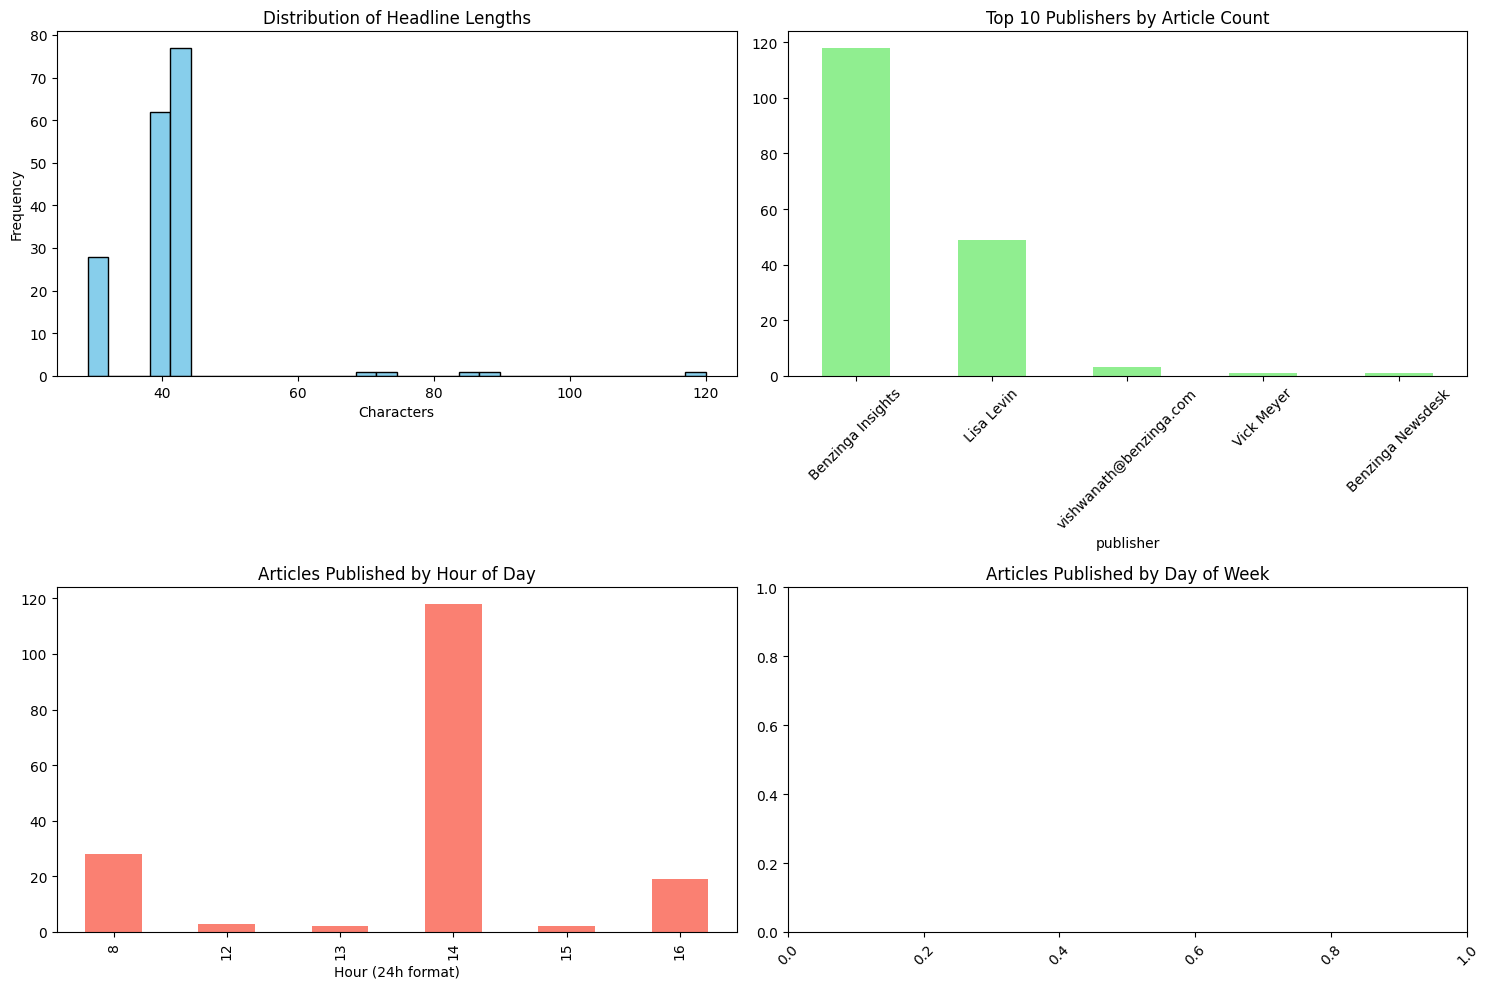

=== Headline Length Statistics ===
count    172.000000
mean      40.331395
std        9.841466
min       29.000000
25%       39.000000
50%       39.000000
75%       42.000000
max      120.000000
Name: headline_length, dtype: float64

=== Top 5 Publishers ===
publisher
Benzinga Insights          118
Lisa Levin                  49
vishwanath@benzinga.com      3
Vick Meyer                   1
Benzinga Newsdesk            1
Name: count, dtype: int64

=== Articles by Hour ===
hour
8      28
12      3
13      2
14    118
15      2
16     19
Name: count, dtype: int64


In [15]:
# Remove rows with invalid dates (if any)
df = df.dropna(subset=['date'])

# 1. Extract temporal features
df['day_of_week'] = df['date'].dt.day_name()  # Monday-Sunday
df['hour'] = df['date'].dt.hour                # 0-23
df['month'] = df['date'].dt.month_name()       # January-December

# 2. Headline length analysis
df['headline_length'] = df['headline'].str.len()
headline_stats = df['headline_length'].describe()

# 3. Publisher analysis
publisher_counts = df['publisher'].value_counts()

# 4. Temporal patterns
daily_counts = df.resample('D', on='date').size()
hourly_counts = df['hour'].value_counts().sort_index()
weekly_counts = df['day_of_week'].value_counts()

# --- Visualizations ---
plt.figure(figsize=(15, 10))

# 1. Headline Length Distribution
plt.subplot(2, 2, 1)
plt.hist(df['headline_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Characters')
plt.ylabel('Frequency')

# 2. Top Publishers
plt.subplot(2, 2, 2)
publisher_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Publishers by Article Count')
plt.xticks(rotation=45)

# 3. Articles by Hour of Day
plt.subplot(2, 2, 3)
hourly_counts.plot(kind='bar', color='salmon')
plt.title('Articles Published by Hour of Day')
plt.xlabel('Hour (24h format)')

# 4. Articles by Day of Week
plt.subplot(2, 2, 4)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.title('Articles Published by Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- Print Key Statistics ---
print("=== Headline Length Statistics ===")
print(headline_stats)
print("\n=== Top 5 Publishers ===")
print(publisher_counts.head())
print("\n=== Articles by Hour ===")
print(hourly_counts)

#Text Analysis(Topic Modeling):
##Use natural language processing to identify common keywords or phrases, potentially extracting topics or ##significant events (like "FDA approval", "price target", etc.).

In [18]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import re  # Using regex for faster text processing

# Download required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Load data
df = pd.read_csv('../data/raw_analyst_ratings/raw_analyst_ratings.csv')

# Quick check
print(f"Data shape: {df.shape}")
print(df.head())

# Faster text processing using regex
def analyze_headlines_fast(headlines, n=20):
    custom_stopwords = set(stopwords.words('english')).union({
        'company', 'stock', 'market', 'price', 'share', 'shares', 
        'said', 'says', 'new', 'year', 'firm', 'inc', 'corp'
    })
    
    # Regex pattern to extract words
    word_pattern = re.compile(r"\b[a-z]{3,}\b")
    
    all_words = []
    for text in headlines.dropna().astype(str):
        text = text.lower()
        words = word_pattern.findall(text)
        words = [w for w in words if w not in custom_stopwords]
        all_words.extend(words)
    
    return Counter(all_words).most_common(n)

# Get top terms
top_terms = analyze_headlines_fast(df['headline'])
print("\nTop 20 terms in headlines:")
for term, count in top_terms:
    print(f"{term}: {count}")

# Fast bigram analysis
def get_top_bigrams_fast(headlines, n=10):
    word_pattern = re.compile(r"\b[a-z]{3,}\b")
    stop_words = set(stopwords.words('english'))
    
    bigrams = []
    for text in headlines.dropna().astype(str):
        text = text.lower()
        words = [w for w in word_pattern.findall(text) if w not in stop_words]
        bigrams.extend(zip(words[:-1], words[1:]))
    
    return Counter(bigrams).most_common(n)

top_bigrams = get_top_bigrams_fast(df['headline'])
print("\nTop 10 bigrams:")
for bigram, count in top_bigrams:
    print(f"{' '.join(bigram)}: {count}")

Data shape: (1407328, 6)
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2

#Time Series Analysis:
##How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
##Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

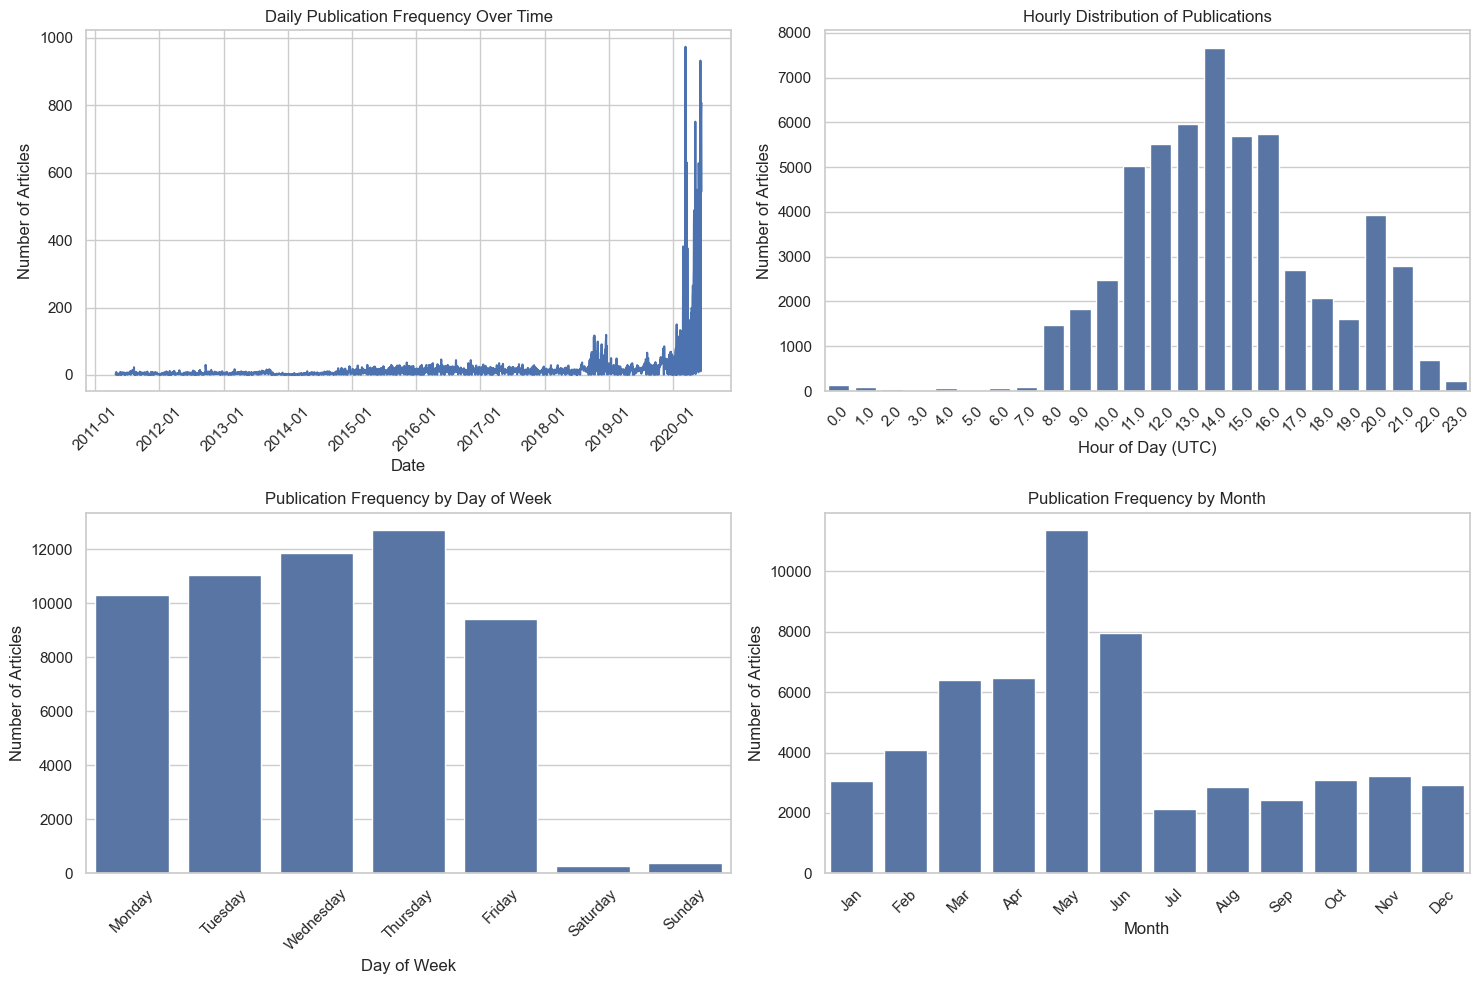


Significant publication spikes detected on these dates:
date_only
2020-03-12    13.883485
2020-06-05    13.284696
2020-06-10    11.459119
2020-06-09    11.400700
2020-06-08    10.845725
2020-05-07    10.641260
2020-06-03    10.188517
2020-03-19     8.874102
2020-05-26     8.844893
2020-05-13     7.691128
dtype: float64

Top 10 publishers by article volume:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Load the data
file_path = '../data/raw_analyst_ratings/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# Parse dates with UTC normalization
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Check for any parsing failures
if df['date'].isna().sum() > 0:
    print(f"Warning: {df['date'].isna().sum()} dates could not be parsed and were set to NaT")

# Convert to timezone-naive if needed (uncomment if preferred)
# df['date'] = df['date'].dt.tz_localize(None)

# Extract date components for analysis
df['date_only'] = df['date'].dt.date  # For daily analysis
df['hour'] = df['date'].dt.hour       # For hourly analysis
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. Daily publication frequency over time
daily_counts = df.groupby('date_only').size()

plt.subplot(2, 2, 1)
daily_counts.plot()
plt.title('Daily Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# 2. Hourly distribution of publications
plt.subplot(2, 2, 2)
hourly_counts = df['hour'].value_counts().sort_index()
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Distribution of Publications')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

# 3. Day of week distribution
plt.subplot(2, 2, 3)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().sort_index()
sns.barplot(x=dow_counts.index, y=dow_counts.values)
plt.title('Publication Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)

# 4. Monthly distribution
plt.subplot(2, 2, 4)
month_counts = df['month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Publication Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)

plt.tight_layout()
plt.show()

# Identify spikes in publication frequency
# Calculate z-scores to find significant deviations from the mean
mean_daily = daily_counts.mean()
std_daily = daily_counts.std()
z_scores = (daily_counts - mean_daily) / std_daily

# Find dates with publication spikes (z-score > 3)
spike_dates = z_scores[z_scores > 3]
print("\nSignificant publication spikes detected on these dates:")
print(spike_dates.sort_values(ascending=False).head(10))

# Additional analysis: Look at top publishers by volume
publisher_counts = df['publisher'].value_counts().head(10)
print("\nTop 10 publishers by article volume:")
print(publisher_counts)

#Publisher Analysis:
##Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
##If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_counts.head(top_n),


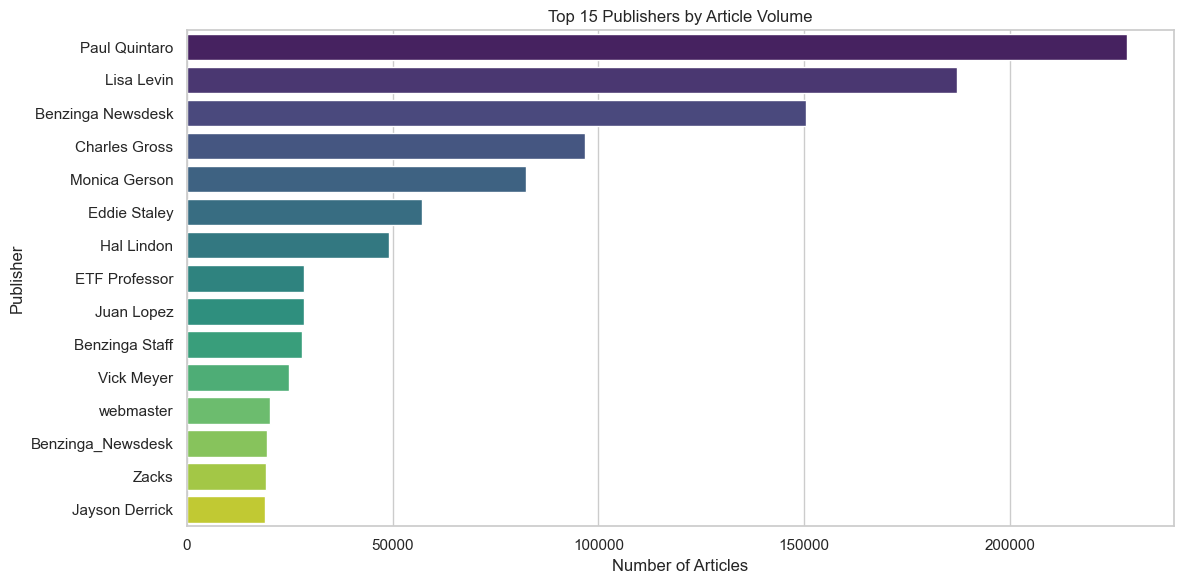

C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=domain_counts.head(top_domains),


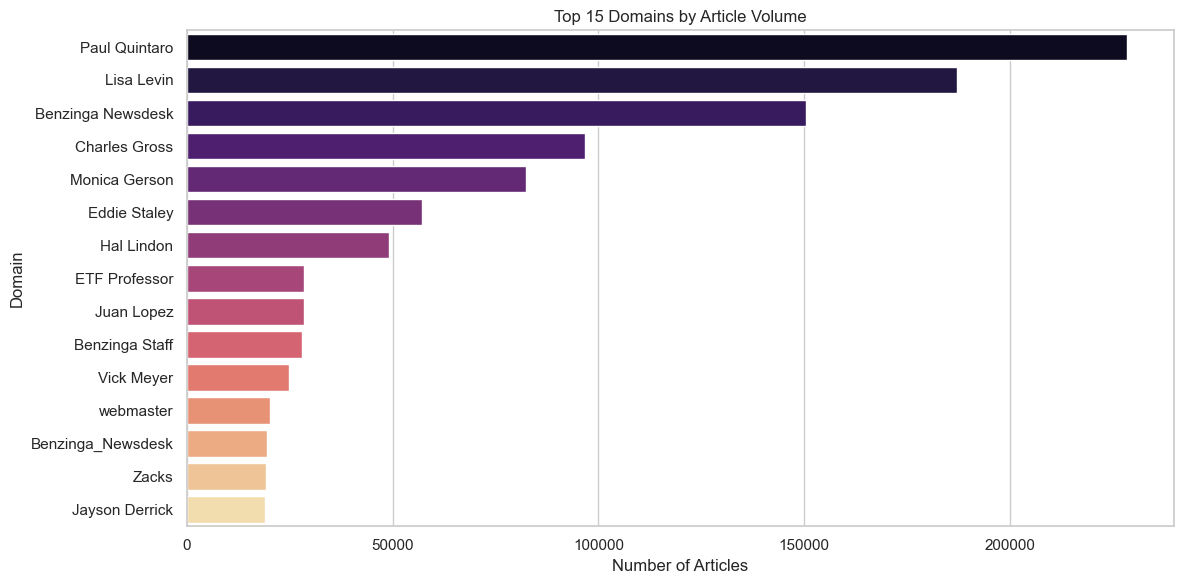

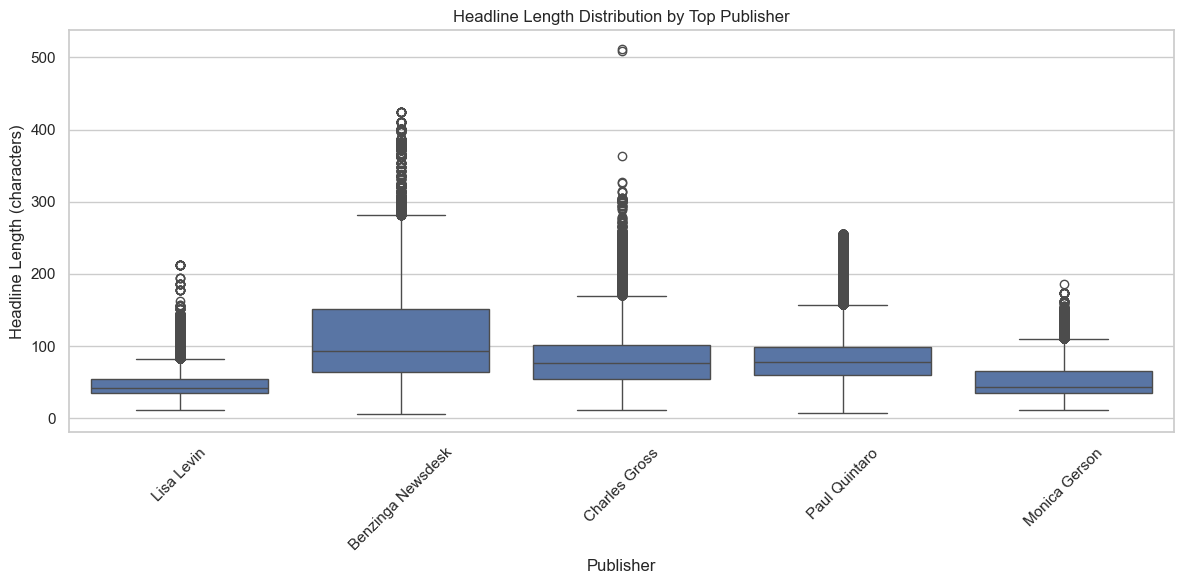


Top keywords for Paul Quintaro:
vs           86110
est          82574
eps          57024
reports      55267
sales        31448
shares       22836
sees         20735
announces    20379
00           18419
pt           15395
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='rocket')


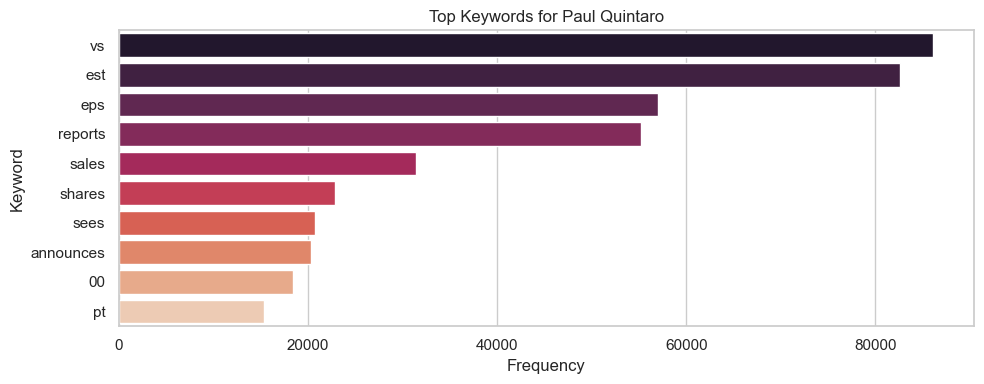


Top keywords for Lisa Levin:
stocks      68373
market      50876
mid         42690
moving      32324
session     32324
biggest     29090
benzinga    28547
day         28211
52          26175
week        25340
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='rocket')


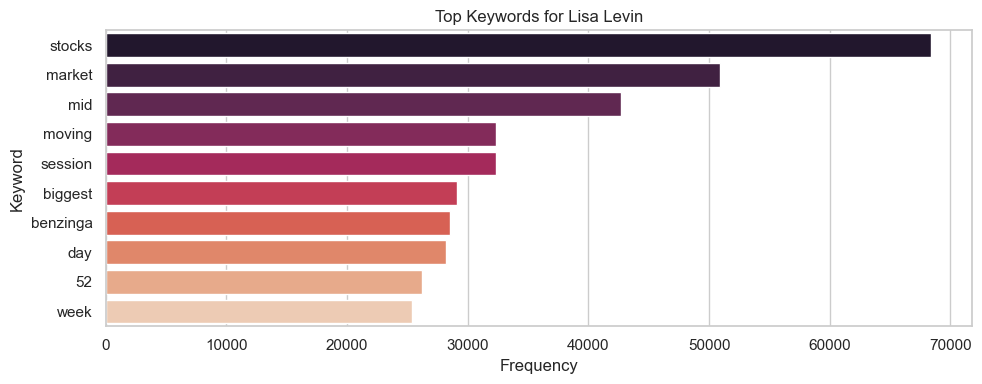


Top keywords for Benzinga Newsdesk:
shares       42673
trading      38841
estimate     29404
stocks       27844
eps          27425
sales        27385
companies    22019
new          21465
week         19759
higher       19071
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='rocket')


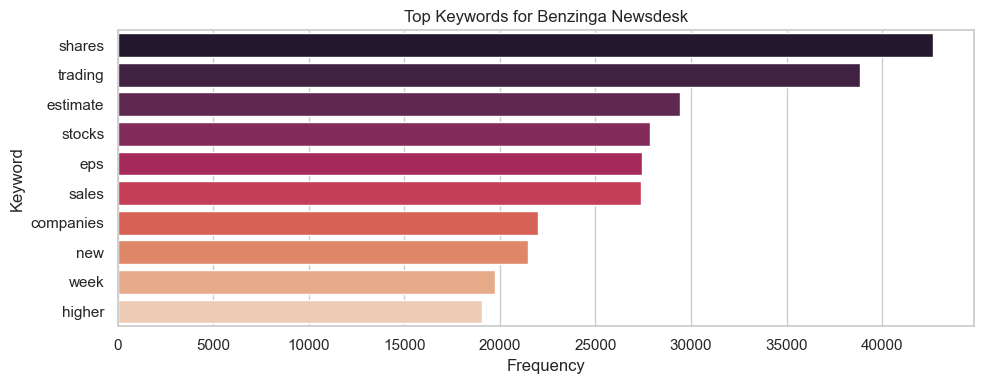

C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:119: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = pub_df.resample('M', on='date').size()
C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:119: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = pub_df.resample('M', on='date').size()
C:\Users\HP\AppData\Local\Temp\ipykernel_19512\3631149825.py:119: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = pub_df.resample('M', on='date').size()


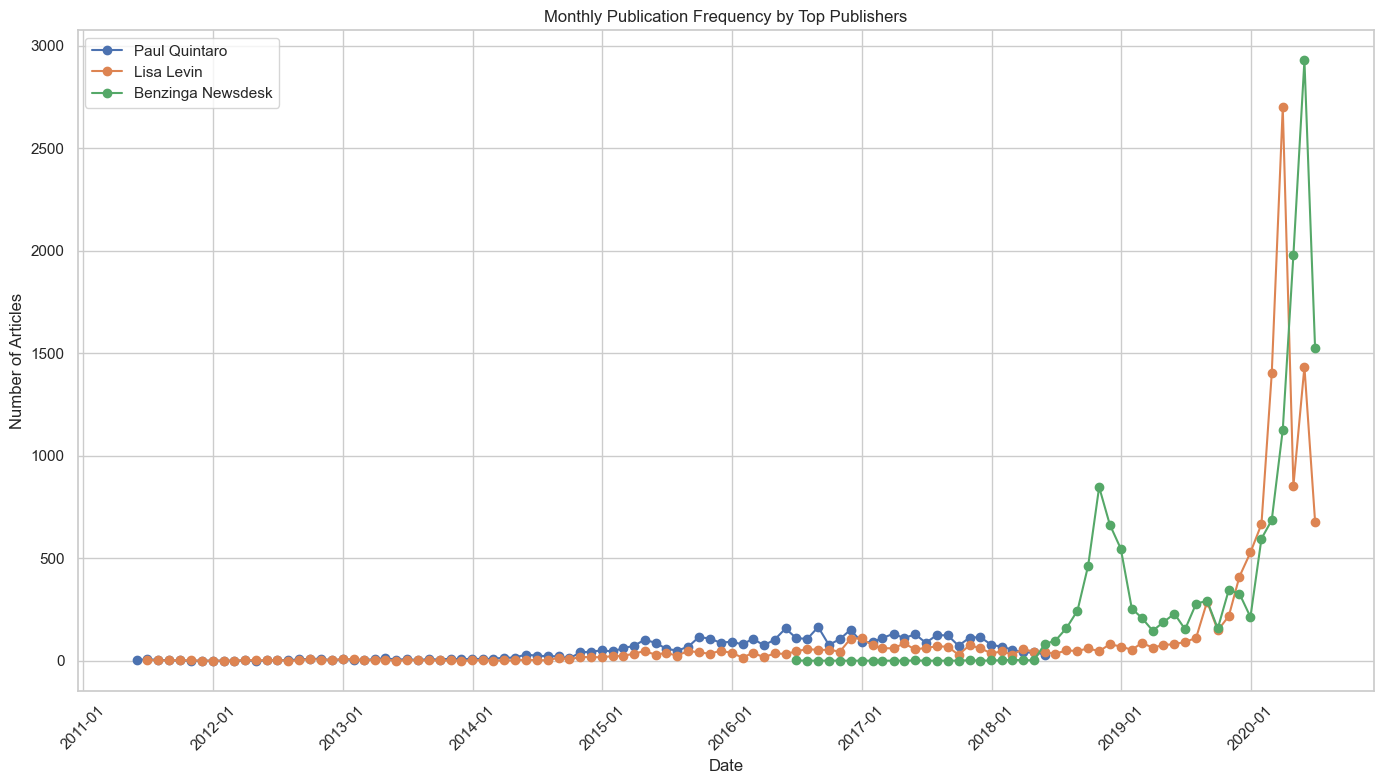

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# Load the data
file_path = '../data/raw_analyst_ratings/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)

# 1. Top Publishers Analysis
# --------------------------
# Count articles by publisher
publisher_counts = df['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'article_count']

# Plot top publishers
plt.figure(figsize=(12, 6))
top_n = 15  # Number of top publishers to show
sns.barplot(data=publisher_counts.head(top_n), 
            x='article_count', 
            y='publisher',
            palette='viridis')
plt.title(f'Top {top_n} Publishers by Article Volume')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# 2. Publisher Domain Analysis (for email addresses)
# -------------------------------------------------
def extract_domain(publisher):
    """Extract domain from email addresses or return original publisher"""
    if pd.isna(publisher):
        return None
    # Simple email regex pattern
    email_pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    if re.match(email_pattern, publisher):
        return publisher.split('@')[-1]
    return publisher

# Apply domain extraction
df['publisher_domain'] = df['publisher'].apply(extract_domain)

# Count articles by domain
domain_counts = df['publisher_domain'].value_counts().reset_index()
domain_counts.columns = ['domain', 'article_count']

# Plot top domains
plt.figure(figsize=(12, 6))
top_domains = 15  # Number of top domains to show
sns.barplot(data=domain_counts.head(top_domains), 
            x='article_count', 
            y='domain',
            palette='magma')
plt.title(f'Top {top_domains} Domains by Article Volume')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# 3. Content Differences Between Publishers
# -----------------------------------------
# Get top 5 publishers for comparison
top_publishers = publisher_counts['publisher'].head(5).tolist()

# Sample analysis: headline length by publisher
df['headline_length'] = df['headline'].str.len()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['publisher'].isin(top_publishers)],
            x='publisher',
            y='headline_length')
plt.title('Headline Length Distribution by Top Publisher')
plt.xlabel('Publisher')
plt.ylabel('Headline Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Keyword Analysis by Publisher
# --------------------------------
from sklearn.feature_extraction.text import CountVectorizer

def get_top_keywords(publisher_name, n_keywords=10):
    """Get top keywords for a specific publisher"""
    publisher_articles = df[df['publisher'] == publisher_name]['headline']
    vectorizer = CountVectorizer(stop_words='english', max_features=100)
    X = vectorizer.fit_transform(publisher_articles)
    word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return word_counts.sum().sort_values(ascending=False).head(n_keywords)

# Compare keywords between top publishers
for publisher in top_publishers[:3]:  # Analyze first 3 top publishers
    top_keywords = get_top_keywords(publisher)
    print(f"\nTop keywords for {publisher}:")
    print(top_keywords)
    
    # Plot keywords for this publisher
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='rocket')
    plt.title(f'Top Keywords for {publisher}')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.tight_layout()
    plt.show()

# 5. Publication Frequency Over Time by Top Publisher
# --------------------------------------------------
# Parse dates if not already done
if 'date' not in df or not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Resample by month for each top publisher
plt.figure(figsize=(14, 8))
for publisher in top_publishers[:3]:  # Plot first 3 top publishers
    pub_df = df[df['publisher'] == publisher]
    monthly_counts = pub_df.resample('M', on='date').size()
    plt.plot(monthly_counts.index, monthly_counts.values, label=publisher, marker='o')

plt.title('Monthly Publication Frequency by Top Publishers')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
date_format = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()